# Campuran dari Berbagai Model 

### Bagian Awal 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
def map_sentiment(sentiment):
    if sentiment == 1:
        return 'positif'
    elif sentiment == 0:
        return 'netral'
    else:
        return 'negatif'

In [3]:
def prepare_datasets(corpus, labels, test_data_proportion=0.3, random_state=42):
    train_X, test_X, train_Y, test_Y = train_test_split(corpus, labels,
                                                        test_size=test_data_proportion,
                                                        random_state=random_state)
    return train_X, test_X, train_Y, test_Y

In [4]:
def tfidf_extractor(corpus, ngram_range=(1,2)):
    vectorizer = TfidfVectorizer(min_df=1,
                                norm='l2',
                                smooth_idf=True,
                                use_idf=True,
                                ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [5]:
df = pd.read_csv('sentiment_2000.csv')
df['sentimen'] = df['sentimen'].map(map_sentiment)
df.head(10)

,content,sentimen
0,capres mahfud md optimistis ppp parlemen tahun...,positif
1,cawapres koalisi perubahan muhaimin iskandar c...,positif
2,capres koalisi pdip ganjar pranowo khawatir su...,positif
3,capres ganjar pranowo mengaku khawatir preside...,positif
4,capres koalisi perubahan anies baswedan presid...,positif
5,capres koalisi perubahan anies baswedan mengak...,positif
6,cawapres koalisi indonesia maju kim gibran rak...,positif
7,capres koalisi perubahan anies baswedan menarg...,positif
8,capres koalisi indonesia maju prabowo subianto...,positif
9,capres koalisi perubahan anies baswedan mengun...,positif


In [6]:
# Split data
x_train, x_test, y_train, y_test = prepare_datasets(df['content'], df['sentimen'], test_data_proportion=0.3)

In [7]:
# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ensure the lengths match after splitting
y_train_encoded = y_train_encoded[:len(x_train)]
y_test_encoded = y_test_encoded[:len(x_test)]

In [8]:
# TF-IDF Vectorization
tfidf_vectorizer, tfidf_train_features = tfidf_extractor(x_train)
tfidf_test_features = tfidf_vectorizer.transform(x_test)

In [9]:
print("Shape of tfidf_train_features:", tfidf_train_features.shape)
print("Length of y_train_encoded:", len(y_train_encoded))

Shape of tfidf_train_features: (1400, 107361)
Length of y_train_encoded: 1400


In [10]:
print("Shape of tfidf_test_features:", tfidf_test_features.shape)
print("Length of y_test_encoded:", len(y_test_encoded))

Shape of tfidf_test_features: (600, 107361)
Length of y_test_encoded: 600


### Model Naiye Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [12]:
# Inisialisasi dan melatih model Naive Bayes
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tfidf_train_features, y_train_encoded)

# Prediksi label untuk data pengujian
y_pred = naive_bayes_classifier.predict(tfidf_test_features)

# Hitung akurasi model
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Akurasi model Naive Bayes:", accuracy)

Akurasi model Naive Bayes: 0.7333333333333333


In [13]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data pengujian menggunakan model terbaik
y_pred_best = naive_bayes_classifier.predict(tfidf_test_features)

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test_encoded, y_pred_best))

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       208
           1       0.73      0.70      0.71       186
           2       0.75      0.71      0.73       206

    accuracy                           0.73       600
   macro avg       0.73      0.73      0.73       600
weighted avg       0.73      0.73      0.73       600



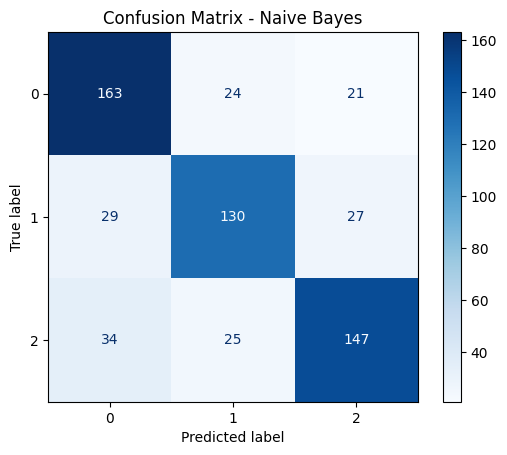

In [14]:
# Membuat matriks kebingungan
cm = confusion_matrix(y_test_encoded, y_pred, labels=naive_bayes_classifier.classes_)
display_labels = naive_bayes_classifier.classes_

# Menampilkan matriks kebingungan
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

# Membuat model Naive Bayes
naive_bayes_classifier = MultinomialNB()

# Daftar parameter yang akan diuji
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Melakukan penyetelan parameter menggunakan GridSearchCV
grid_search = GridSearchCV(naive_bayes_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(tfidf_train_features, y_train_encoded)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("Parameter terbaik:", best_params)

# Mendapatkan model terbaik
best_naive_bayes = grid_search.best_estimator_

# Prediksi label untuk data pengujian menggunakan model terbaik
y_pred_best = best_naive_bayes.predict(tfidf_test_features)

# Hitung akurasi model terbaik
accuracy_best = accuracy_score(y_test_encoded, y_pred_best)
print("Akurasi model Naive Bayes setelah penyetelan parameter:", accuracy_best)


Parameter terbaik: {'alpha': 1.0}
Akurasi model Naive Bayes setelah penyetelan parameter: 0.7333333333333333


### Model SVM

In [16]:
from sklearn.svm import SVC

# Inisialisasi dan melatih model SVM
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(tfidf_train_features, y_train_encoded)

# Prediksi label untuk data pengujian
y_pred_svm = svm_classifier.predict(tfidf_test_features)

# Hitung akurasi model SVM
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
print("Akurasi model SVM:", accuracy_svm)

Akurasi model SVM: 0.7583333333333333


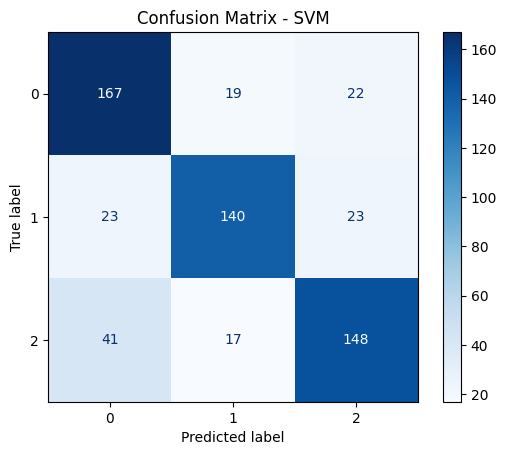

In [17]:
# Membuat matriks kebingungan
cm_svm = confusion_matrix(y_test_encoded, y_pred_svm, labels=svm_classifier.classes_)
display_labels_svm = svm_classifier.classes_

# Menampilkan matriks kebingungan
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=display_labels_svm)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM")
plt.show()

In [18]:
# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi SVM:")
print(classification_report(y_test_encoded, y_pred_svm))

Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       208
           1       0.80      0.75      0.77       186
           2       0.77      0.72      0.74       206

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.76      0.76      0.76       600



In [19]:
from sklearn.model_selection import GridSearchCV

# Membuat model SVM
svm_classifier = SVC()

# Daftar parameter yang akan diuji
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Melakukan penyetelan parameter menggunakan GridSearchCV
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(tfidf_train_features, y_train_encoded)

# Mendapatkan parameter terbaik
best_params_svm = grid_search_svm.best_params_
print("Parameter terbaik SVM:", best_params_svm)

# Mendapatkan model terbaik
best_svm = grid_search_svm.best_estimator_

# Prediksi label untuk data pengujian menggunakan model terbaik
y_pred_best_svm = best_svm.predict(tfidf_test_features)

# Menampilkan laporan klasifikasi untuk model terbaik
print("Laporan Klasifikasi SVM (Best Model):")
print(classification_report(y_test_encoded, y_pred_best_svm))


Parameter terbaik SVM: {'C': 1, 'kernel': 'linear'}
Laporan Klasifikasi SVM (Best Model):
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       208
           1       0.80      0.75      0.77       186
           2       0.77      0.72      0.74       206

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.76      0.76      0.76       600



In [20]:
# Menampilkan akurasi model terbaik
accuracy_best_svm = accuracy_score(y_test_encoded, y_pred_best_svm)
print("Akurasi model SVM setelah penyetelan parameter:", accuracy_best_svm)

Akurasi model SVM setelah penyetelan parameter: 0.7583333333333333


### Model Regresi Logistik

In [21]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(tfidf_train_features, y_train_encoded)
y_pred_lr = logistic_regression.predict(tfidf_test_features)
accuracy_lr = accuracy_score(y_test_encoded, y_pred_lr)
print("Akurasi model Regresi Logistik:", accuracy_lr)

Akurasi model Regresi Logistik: 0.755


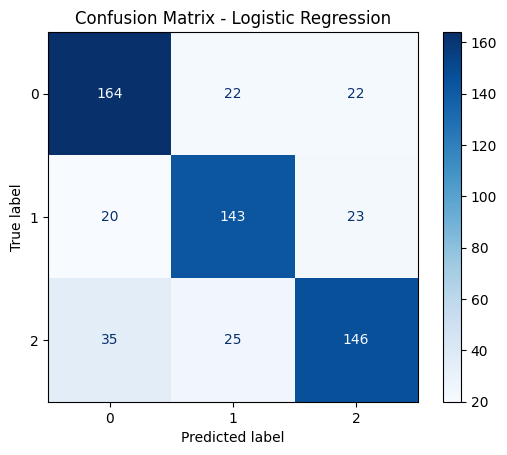

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       208
           1       0.75      0.77      0.76       186
           2       0.76      0.71      0.74       206

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.75       600
weighted avg       0.76      0.76      0.75       600



In [22]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test_encoded, y_pred_lr, labels=logistic_regression.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=logistic_regression.classes_)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Classification Report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test_encoded, y_pred_lr))

In [23]:
# Tuning Logistic Regression Model
logistic_regression_tuned = LogisticRegression(max_iter=1000)
param_grid_lr = {'C': [0.1, 1, 10], 'penalty': ['l2']}
grid_search_lr = GridSearchCV(logistic_regression_tuned, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(tfidf_train_features, y_train_encoded)
best_params_lr = grid_search_lr.best_params_
print("Best Parameters for Logistic Regression:", best_params_lr)
best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(tfidf_test_features)

Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}


In [24]:
# Classification Report for Best Logistic Regression Model
print("Classification Report for Best Logistic Regression Model:")
print(classification_report(y_test_encoded, y_pred_best_lr))

Classification Report for Best Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       208
           1       0.75      0.77      0.76       186
           2       0.76      0.71      0.74       206

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.75       600
weighted avg       0.76      0.76      0.75       600



In [25]:
# Mendapatkan akurasi dari model Regresi Logistik dengan parameter terbaik
accuracy_best_lr = accuracy_score(y_test_encoded, y_pred_best_lr)
print("Akurasi model Regresi Logistik (Best Parameters):", accuracy_best_lr)

Akurasi model Regresi Logistik (Best Parameters): 0.755


### Model Ensemble Learning

In [26]:
from sklearn.ensemble import VotingClassifier

# Membuat model Ensemble Learning
ensemble_model = VotingClassifier(estimators=[
    ('naive_bayes', naive_bayes_classifier),
    ('svm', best_svm),
    ('logistic_regression', best_lr)
], voting='hard')

In [27]:
# Melatih model Ensemble Learning
ensemble_model.fit(tfidf_train_features, y_train_encoded)

# Prediksi label untuk data pengujian
y_pred_ensemble = ensemble_model.predict(tfidf_test_features)

# Akurasi model Ensemble Learning
accuracy_ensemble = accuracy_score(y_test_encoded, y_pred_ensemble)
print("Akurasi model Ensemble Learning:", accuracy_ensemble)

Akurasi model Ensemble Learning: 0.7616666666666667


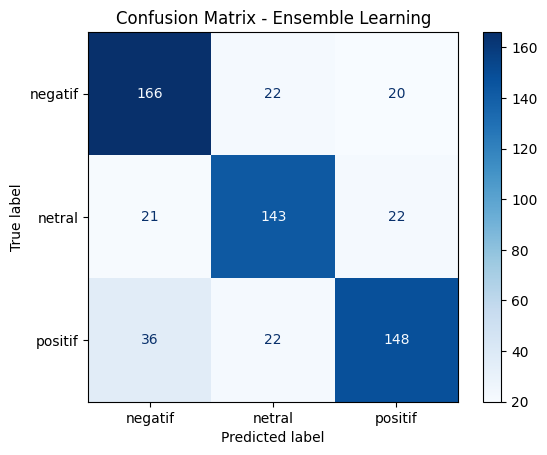

In [28]:
# Confusion Matrix untuk model Ensemble Learning
cm_ensemble = confusion_matrix(y_test_encoded, y_pred_ensemble)
disp_ensemble = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble, display_labels=label_encoder.classes_)
disp_ensemble.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Ensemble Learning")
plt.show()

In [29]:
# Classification Report untuk model Ensemble Learning
print("Classification Report for Ensemble Learning:")
print(classification_report(y_test_encoded, y_pred_ensemble))

Classification Report for Ensemble Learning:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       208
           1       0.76      0.77      0.77       186
           2       0.78      0.72      0.75       206

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.76      0.76      0.76       600



In [30]:
# Tuning parameter untuk model Ensemble Learning
param_grid_ensemble = {
    'naive_bayes__alpha': [0.1, 1, 10],
    'svm__C': [0.1, 1, 10],
    'logistic_regression__C': [0.1, 1, 10]
}

grid_search_ensemble = GridSearchCV(ensemble_model, param_grid_ensemble, cv=5, scoring='accuracy')
grid_search_ensemble.fit(tfidf_train_features, y_train_encoded)

# Mendapatkan parameter terbaik untuk model Ensemble Learning
best_params_ensemble = grid_search_ensemble.best_params_
print("Best Parameters for Ensemble Learning:", best_params_ensemble)

Best Parameters for Ensemble Learning: {'logistic_regression__C': 1, 'naive_bayes__alpha': 10, 'svm__C': 1}


Akurasi model Ensemble Learning (Best Parameters): 0.755


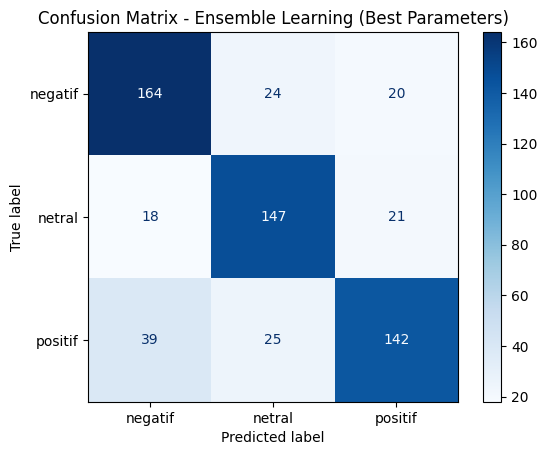

In [31]:
# Prediksi label menggunakan model Ensemble Learning dengan parameter terbaik
best_ensemble_model = grid_search_ensemble.best_estimator_
y_pred_best_ensemble = best_ensemble_model.predict(tfidf_test_features)

# Akurasi model Ensemble Learning dengan parameter terbaik
accuracy_best_ensemble = accuracy_score(y_test_encoded, y_pred_best_ensemble)
print("Akurasi model Ensemble Learning (Best Parameters):", accuracy_best_ensemble)

# Confusion Matrix untuk model Ensemble Learning dengan parameter terbaik
cm_best_ensemble = confusion_matrix(y_test_encoded, y_pred_best_ensemble)
disp_best_ensemble = ConfusionMatrixDisplay(confusion_matrix=cm_best_ensemble, display_labels=label_encoder.classes_)
disp_best_ensemble.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Ensemble Learning (Best Parameters)")
plt.show()